# Plot the atom/vacancy distribution as a function of SiO2 thickness

## step1: Import packages

In [34]:
import numpy as np 
import matplotlib.pyplot as plt 
import uncertainties as unc
import pandas as pd
import uncertainties.unumpy as unp
from matplotlib import cm
import matplotlib.colors as col
from mpl_toolkits.mplot3d import Axes3D
from lmfit.models import ExponentialModel, GaussianModel

## step2: Import data

In [35]:
data1nm = pd.read_csv('data1nm.csv')
data2nm = pd.read_csv('data2nm.csv')
data5nm = pd.read_csv('data5nm.csv')
data10nm = pd.read_csv('data10nm.csv')
data20nm = pd.read_csv('data20nm.csv')
data30nm = pd.read_csv('data30nm.csv')
data50nm = pd.read_csv('data50nm.csv')

## step3: Convert data into common units

In [36]:
data10nm

,Depth,Si,C
0,0.0,75200000.0,0.000000
1,0.5,41300000.0,2.480000
2,1.0,6370000.0,2.440000
3,1.5,2180000.0,2.390000
4,2.0,1420000.0,2.320000
...,...,...,...
56,28.0,0.0,0.008220
57,28.5,0.0,0.005870
58,29.0,0.0,0.000939
59,29.5,0.0,0.002580


## step4: 3D Plot

### Simple Plot

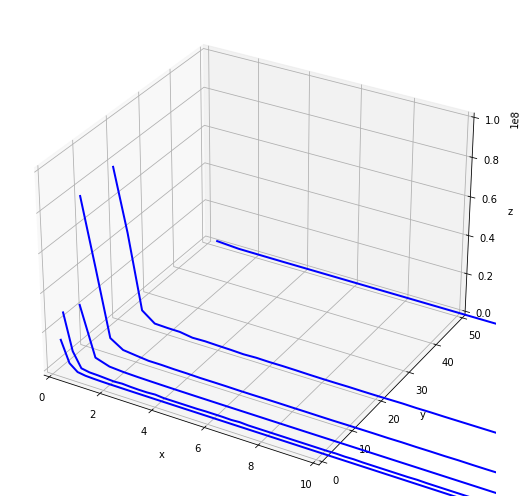

In [37]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(projection='3d')
plt.grid()

#ax.legend()
ax.set_xlim(0, 10)
ax.set_ylim(0, 50)
ax.set_zlim(0, 1e8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
              
#plot
ax.plot(data1nm['Depth'],data1nm['Si'], zs=1, zdir='y', lw = 2, color = 'b')
ax.plot(data2nm['Depth'],data2nm['Si'], zs=2, zdir='y', lw = 2, color = 'b')
ax.plot(data5nm['Depth'],data5nm['Si'], zs=5, zdir='y', lw = 2, color = 'b')
ax.plot(data10nm['Depth'],data10nm['Si'], zs=10, zdir='y', lw = 2, color = 'b')
ax.plot(data20nm['Depth'],data20nm['Si'], zs=20, zdir='y', lw = 2, color = 'b')
ax.plot(data50nm['Depth'],data50nm['Si'], zs=50, zdir='y', lw = 2, color = 'b')


### Fill the curve

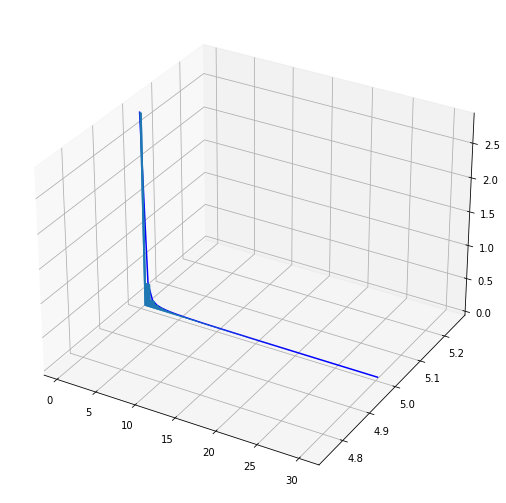

In [38]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(projection='3d')
plt.grid()
x=data5nm['Depth']
y = data5nm['Si']
ax.plot(x, y, zs=5, zdir='y',color = 'b')
td_col_obj = ax.fill_between(x, 0, y, step='mid', alpha=1) 
ax.add_collection3d(td_col_obj, zs = 5, zdir = 'y')
plt.show()

### Interpolate


In [39]:
def plot3d(depth,data,thickness):
    model1 = ExponentialModel() 
    model = model1
    params = model.make_params()
    params['amplitude'].set(value = data[0], vary=True)
    params['decay'].set(value = 2, vary=True)
    model_fit = model.fit(data, params, x=depth)
    fit_x = np.linspace(0,20,1000)
    fitcurve = model_fit.eval(model_fit.params, x = fit_x)
    ax.plot(fit_x, fitcurve, zs=thickness, zdir='y')
    obj = ax.fill_between(fit_x, 0, fitcurve, step='pre', alpha=1) 
    ax.add_collection3d(obj, zs = thickness, zdir = 'y')


No handles with labels found to put in legend.


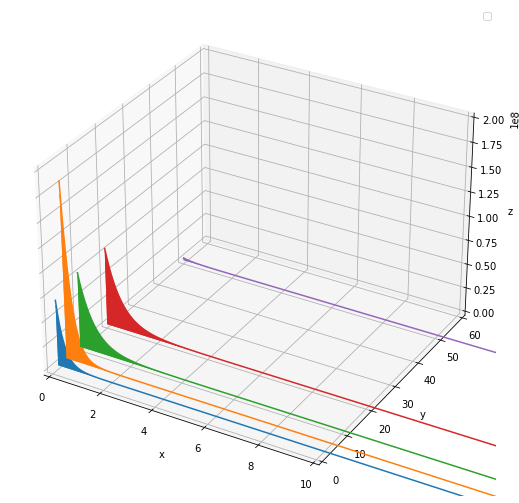

In [40]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(projection='3d')
plt.grid()

ax.legend()
ax.set_xlim(0, 10)
ax.set_ylim(0, 60)
ax.set_zlim(0, 2e8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
              
#plot
# plot3d(data1nm['Depth'],data1nm['Si'], 1)
plot3d(data2nm['Depth'],data2nm['Si'], 2)
plot3d(data5nm['Depth'],data5nm['Si'], 5)
plot3d(data10nm['Depth'],data10nm['Si'],10)
plot3d(data20nm['Depth'],data20nm['Si'], 20)
plot3d(data50nm['Depth'],data50nm['Si'], 50)


plt.show()

In [41]:
def plot3d(x,y,z):
    ax.plot(x, y, zs=z, zdir='y', lw = 0.75, label = 'vacancy')
    obj = ax.fill_between(x, 0, y, step='mid', alpha=0.1) 
    ax.add_collection3d(obj, zs = z, zdir = 'y')

No handles with labels found to put in legend.


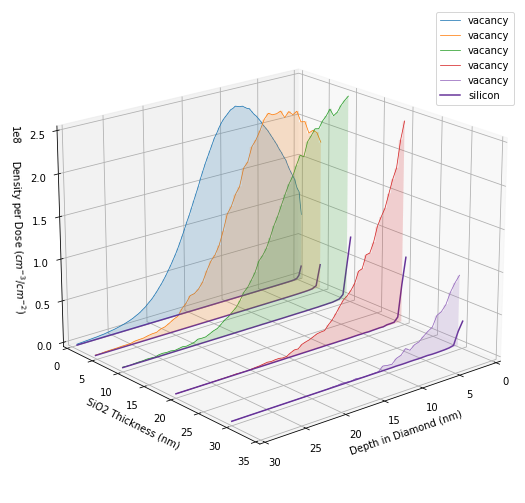

In [42]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(projection='3d')
plt.grid()

ax.legend()
ax.set_xlim(0, 30)
ax.set_ylim(0, 35)
ax.set_zlim(0, 2.5e8)
ax.set_xlabel('Depth in Diamond (nm)')
ax.set_ylabel('SiO2 Thickness (nm)')
ax.set_zlabel('Density per Dose ($cm^{-3}$/$cm^{-2}$)')

\
#plot
# plot3d(data1nm['Depth'],data1nm['Si'], 1)
# plot3d(data2nm['Depth'],data2nm['C']*1e8, 2)
plot3d(data1nm['Depth'],data1nm['C']*1e8, 1)
plot3d(data5nm['Depth'],data5nm['C']*1e8, 5)
plot3d(data10nm['Depth'][1:],data10nm['C'][1:]*1e8,10)
plot3d(data20nm['Depth'][1:],data20nm['C'][1:]*1e8, 20)
plot3d(data30nm['Depth'][1:],data30nm['C'][1:]*1e8, 30)
# plot3d(data50nm['Depth'],data50nm['C']*1e8, 50)



ax.plot(data1nm['Depth'],data1nm['Si'], zs=1, zdir='y', lw = 1.5, color = 'rebeccapurple', label = 'silicon')
ax.plot(data5nm['Depth'],data5nm['Si'], zs=5, zdir='y', lw = 1.5, color = 'rebeccapurple')
ax.plot(data10nm['Depth'],data10nm['Si'], zs=10, zdir='y', lw = 1.5, color = 'rebeccapurple')
ax.plot(data20nm['Depth'],data20nm['Si'], zs=20, zdir='y', lw = 1.5, color = 'rebeccapurple')
ax.plot(data30nm['Depth'],data30nm['Si'], zs=30, zdir='y', lw = 1.5, color = 'rebeccapurple')


ax.view_init(elev=20., azim=50)

plt.legend()

### Fit with a gaussian

In [43]:
model1 = GaussianModel() 
model = model1
params = model.make_params()
print('parameter names: {}'.format(model.param_names))

parameter names: ['amplitude', 'center', 'sigma', 'fwhm', 'height']


[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 60
    # variables        = 3
    chi-square         = 0.09207318
    reduced chi-square = 0.00161532
    Akaike info crit   = -382.770966
    Bayesian info crit = -376.487932
    R-squared          = 0.99814375
[[Variables]]
    amplitude:  41.0825903 +/- 0.66876349 (1.63%) (init = 2e+08)
    center:     2.11702347 +/- 0.13010511 (6.15%) (init = 0)
    sigma:      6.82629609 +/- 0.09529502 (1.40%) (init = 7.5)
    fwhm:       16.0746986 +/- 0.22440261 (1.40%) == '2.3548200*sigma'
    height:     2.40094816 +/- 0.01364317 (0.57%) == '0.3989423*amplitude/max(1e-15, sigma)'


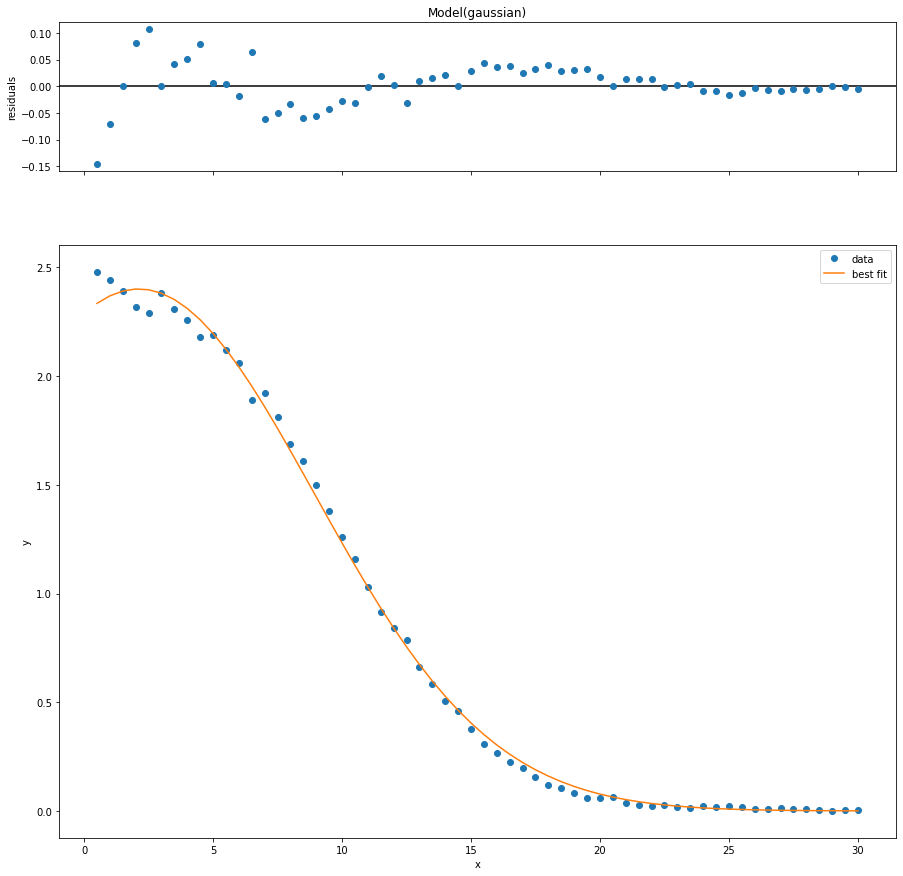

In [44]:
params['amplitude'].set(value = 2e8, vary=True)
params['center'].set(value = 0, vary=True)
params['sigma'].set(value = 7.5, vary=True)
    
model_fit = model.fit(data10nm['C'][1:], params, x=data10nm['Depth'][1:])
print(model_fit.fit_report(show_correl=False))

myfig=plt.figure(figsize=(15,15))
model_fit.plot(fig=myfig);
# fit_x = np.linspace(0,20,1000)
# fitcurve = model_fit.eval(model_fit.params, x = fit_x)

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 34
    # data points      = 55
    # variables        = 3
    chi-square         = 0.12209635
    reduced chi-square = 0.00234801
    Akaike info crit   = -330.065290
    Bayesian info crit = -324.043290
    R-squared          = 0.99737314
[[Variables]]
    amplitude:  37.7324717 +/- 0.35384284 (0.94%) (init = 2e+08)
    center:     5.64636768 +/- 0.06757481 (1.20%) (init = 0)
    sigma:      6.38845585 +/- 0.06987808 (1.09%) (init = 7.5)
    fwhm:       15.0436636 +/- 0.16455031 (1.09%) == '2.3548200*sigma'
    height:     2.35629382 +/- 0.01369754 (0.58%) == '0.3989423*amplitude/max(1e-15, sigma)'


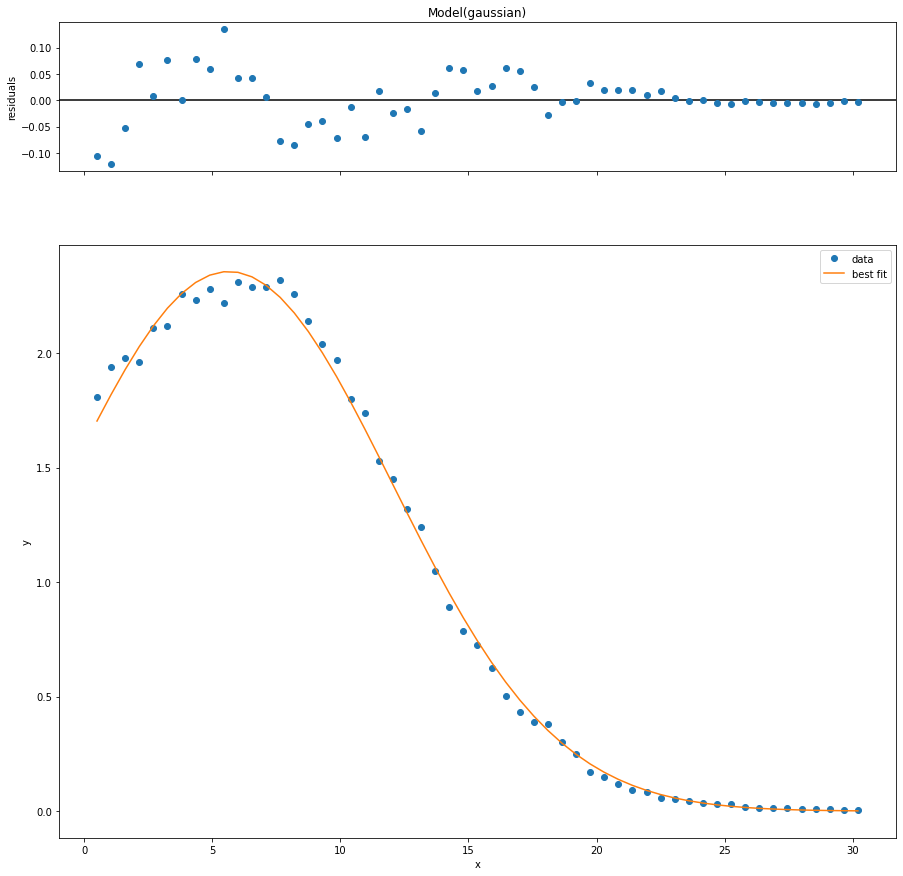

In [45]:
model_fit = model.fit(data5nm['C'], params, x=data5nm['Depth'])
print(model_fit.fit_report(show_correl=False))

myfig=plt.figure(figsize=(15,15))
model_fit.plot(fig=myfig);
# fit_x = np.linspace(0,20,1000)
# fitcurve = model_fit.eval(model_fit.params, x = fit_x)

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 42
    # data points      = 60
    # variables        = 3
    chi-square         = 0.03904761
    reduced chi-square = 6.8505e-04
    Akaike info crit   = -434.239084
    Bayesian info crit = -427.956050
    R-squared          = 0.99824224
[[Variables]]
    amplitude:  350.440375 +/- 134.899756 (38.49%) (init = 2e+08)
    center:    -19.3023951 +/- 3.10317577 (16.08%) (init = 0)
    sigma:      10.6876802 +/- 0.69620807 (6.51%) (init = 7.5)
    fwhm:       25.1675630 +/- 1.63944469 (6.51%) == '2.3548200*sigma'
    height:     13.0809948 +/- 4.19093843 (32.04%) == '0.3989423*amplitude/max(1e-15, sigma)'


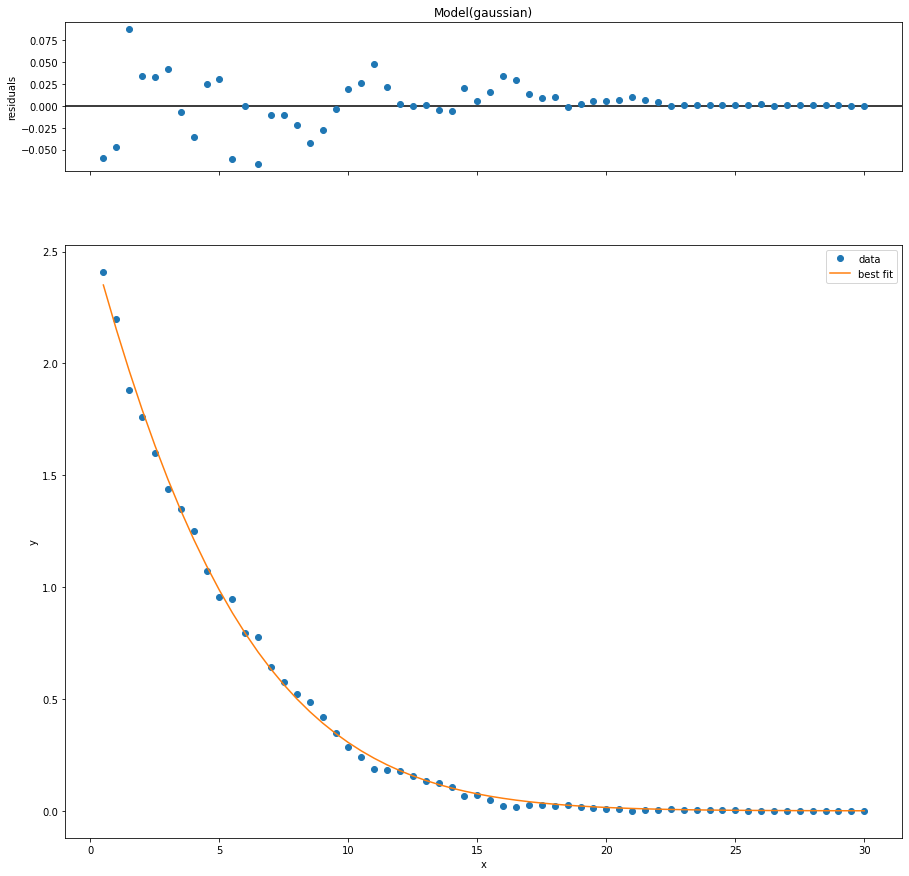

In [46]:
model_fit = model.fit(data20nm['C'][1:], params, x=data20nm['Depth'][1:])
print(model_fit.fit_report(show_correl=False))

myfig=plt.figure(figsize=(15,15))
model_fit.plot(fig=myfig);
# fit_x = np.linspace(0,20,1000)
# fitcurve = model_fit.eval(model_fit.params, x = fit_x)

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 42
    # data points      = 96
    # variables        = 3
    chi-square         = 0.16032207
    reduced chi-square = 0.00172389
    Akaike info crit   = -607.912197
    Bayesian info crit = -600.219152
    R-squared          = 0.99780303
[[Variables]]
    amplitude:  35.9802345 +/- 0.15899924 (0.44%) (init = 2e+08)
    center:     8.32227260 +/- 0.02982094 (0.36%) (init = 0)
    sigma:      6.09034346 +/- 0.03333627 (0.55%) (init = 7.5)
    fwhm:       14.3416626 +/- 0.07850092 (0.55%) == '2.3548200*sigma'
    height:     2.35685190 +/- 0.00895524 (0.38%) == '0.3989423*amplitude/max(1e-15, sigma)'


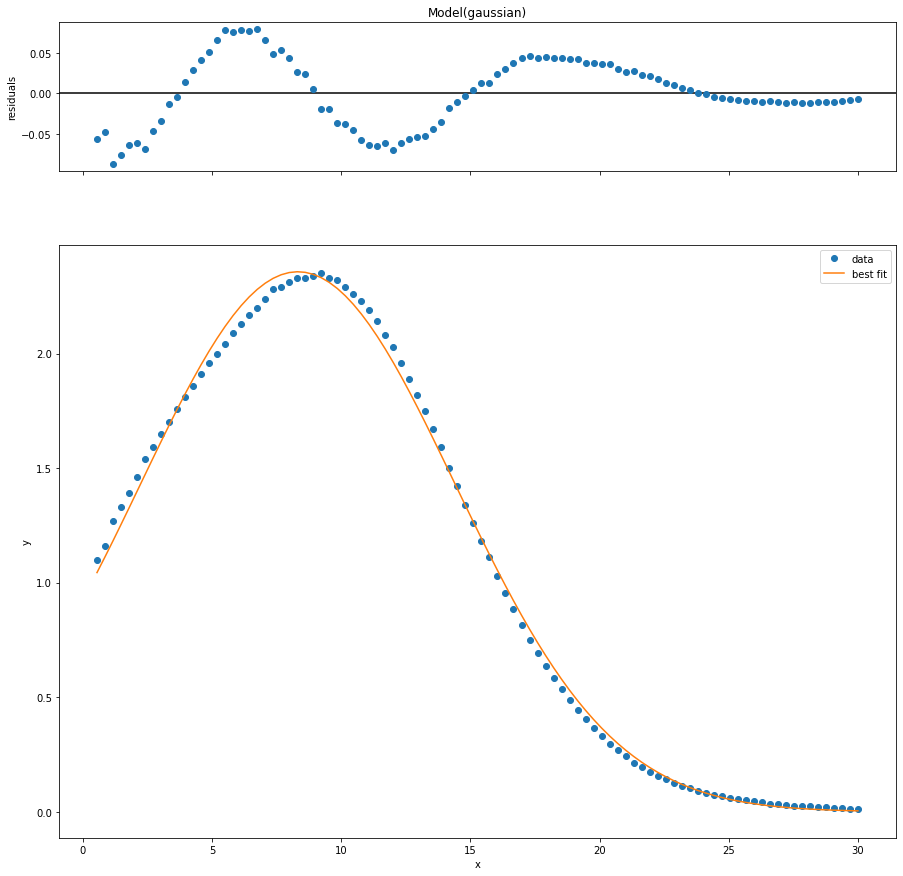

In [47]:
model_fit = model.fit(data1nm['C'][1:], params, x=data1nm['Depth'][1:])
print(model_fit.fit_report(show_correl=False))

myfig=plt.figure(figsize=(15,15))
model_fit.plot(fig=myfig);

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 38
    # data points      = 50
    # variables        = 3
    chi-square         = 0.01002508
    reduced chi-square = 2.1330e-04
    Akaike info crit   = -419.734415
    Bayesian info crit = -413.998346
    R-squared          = 0.99552280
[[Variables]]
    amplitude:  64.0016967 +/- 34.2606632 (53.53%) (init = 2e+08)
    center:    -12.0454795 +/- 3.29860445 (27.38%) (init = 0)
    sigma:      7.68663198 +/- 0.80933520 (10.53%) (init = 7.5)
    fwhm:       18.1006347 +/- 1.90583872 (10.53%) == '2.3548200*sigma'
    height:     3.32173885 +/- 1.43237656 (43.12%) == '0.3989423*amplitude/max(1e-15, sigma)'


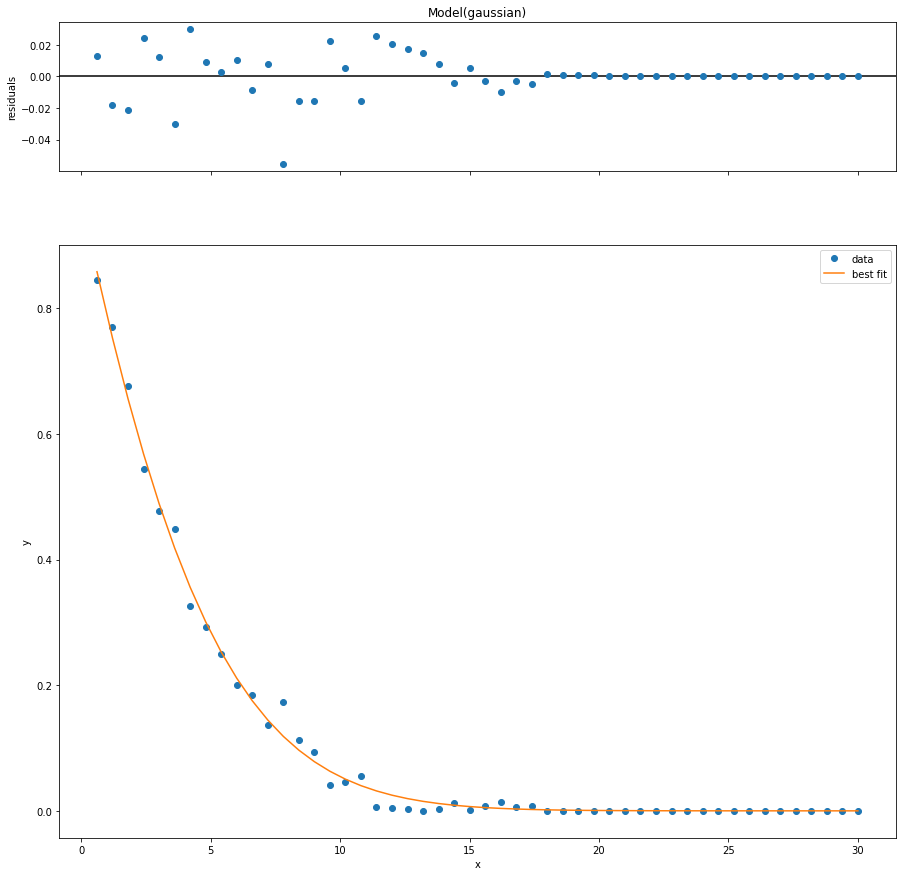

In [49]:
model_fit = model.fit(data30nm['C'][1:], params, x=data30nm['Depth'][1:])
print(model_fit.fit_report(show_correl=False))

myfig=plt.figure(figsize=(15,15))
model_fit.plot(fig=myfig);